In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os

In [67]:
#Put the target csv file in this directory, and save as "input.csv".
PATH = './'
fileNames = os.listdir(PATH)
fileNames = [file for file in fileNames if '.csv' in file]

In [69]:
fileNames

['gsFilt.csv', 'karaFilt.csv', 'toomFilt.csv']

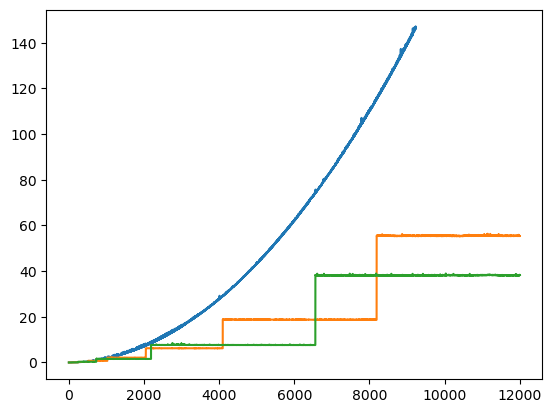

In [71]:
for file in fileNames:
    df = pd.read_csv(PATH + file, index_col = 0)
    plt.plot(df)

In [55]:
from scipy import stats

df = pd.read_csv('newinput.csv')

def remove_outliers(group):
    z_scores = stats.zscore(group['time'])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < 3) 
    return group[filtered_entries]

df_cleaned = df.groupby('n').apply(remove_outliers).reset_index(drop=True)
df_avg = df_cleaned.groupby('n')['time'].mean().reset_index()

df_avg.to_csv('output.csv', index=False)

/var/folders/sz/csbx9jjd4gq2qbdqk5_fxf4w0000gn/T/ipykernel_50487/3377856369.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cleaned = df.groupby('n').apply(remove_outliers).reset_index(drop=True)


In [56]:
nw = pd.read_csv('output.csv')

In [57]:
nw

,n,time
0,1,0.001070
1,2,0.000983
2,3,0.001025
3,4,0.001019
4,5,0.001005
...,...,...
11995,11996,55.399233
11996,11997,55.479487
11997,11998,55.437720
11998,11999,55.331548


In [58]:
PATH = './'
fileNames = os.listdir(PATH)
fileNames = [file for file in fileNames if '.csv' in file]
fileNames

['gsFilt.csv', 'newinput.csv', 'output.csv', 'toomFilt.csv']

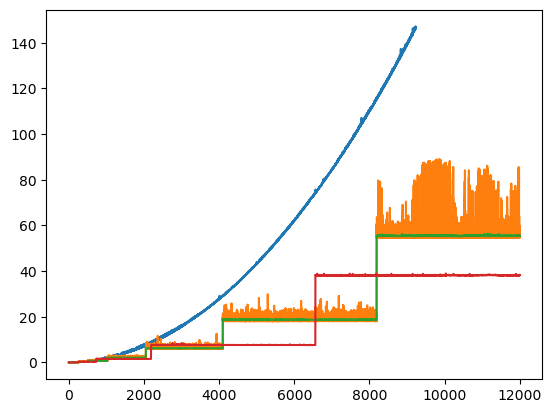

In [59]:
for file in fileNames:
    df = pd.read_csv(PATH + file, index_col = 0)
    plt.plot(df)